## Introduction

EDA for EARTHDATA-MERRA2

How to read netCDF4  file:  file:https://disc.gsfc.nasa.gov/information/howto?title=How%20to%20read%20and%20plot%20NetCDF%20MERRA-2%20data%20in%20Python

Meaning of columns:

https://gmao.gsfc.nasa.gov/pubs/docs/Bosilovich785.pdf

Name Dim Description Units  
COCL tyx CO Column Burden kg m-2  
COEM tyx CO Emission kg m-2 s-1  
COLS tyx CO Chemical Loss kg m-2s-1  
COPD tyx CO Chemical Production kg m-2 s-1  
COSC tyx CO Surface Concentration in ppbv 1e-9  
LWI tyx land(1) water(0) ice(2) flag 1  
TO3 tyx total column ozone Dobsons   


## Batch process the archive

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap, HeatMapWithTime
from netCDF4 import Dataset
import cartopy.crs as ccrs
import os

In [21]:
def plot_merra_data(data, title='', date='April 2020', label="kg m-2"):
    fig = plt.figure(figsize=(16,8))
    ax = plt.axes(projection=ccrs.Robinson())
    ax.set_global()
    ax.coastlines(resolution="110m",linewidth=1)
    ax.gridlines(linestyle='--',color='black')
    plt.contourf(lons, lats, data, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
    plt.title(f'MERRA-2 {title} levels, {date}', size=14)
    cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
    cb.set_label(f'{label}',size=12,rotation=0,labelpad=15)
    cb.ax.tick_params(labelsize=10)
    plt.show()

## CO Column Burden [kg m-2]

MERRA2_400.tavgM_2d_chm_Nx.201901.nc4 201901


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  


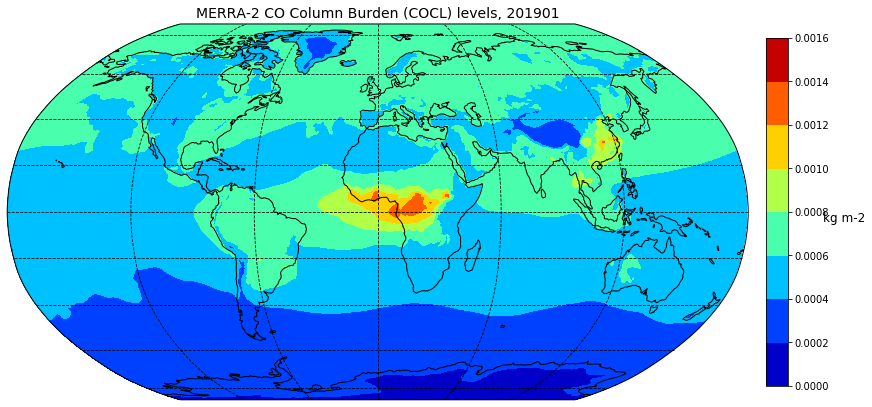

MERRA2_400.tavgM_2d_chm_Nx.201902.nc4 201902


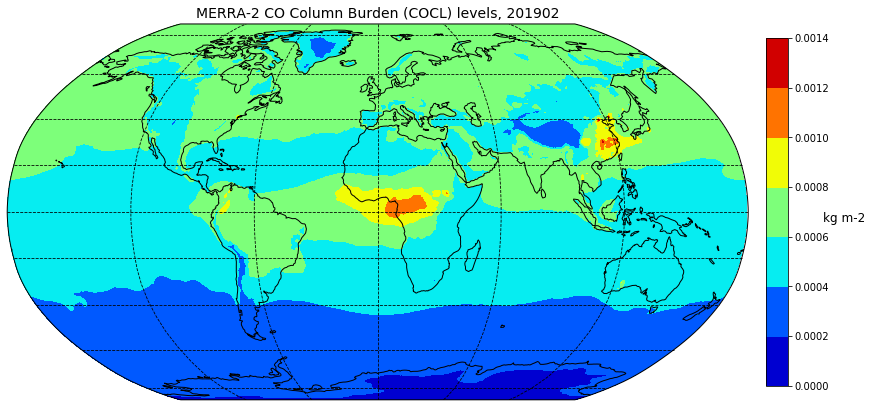

MERRA2_400.tavgM_2d_chm_Nx.201903.nc4 201903


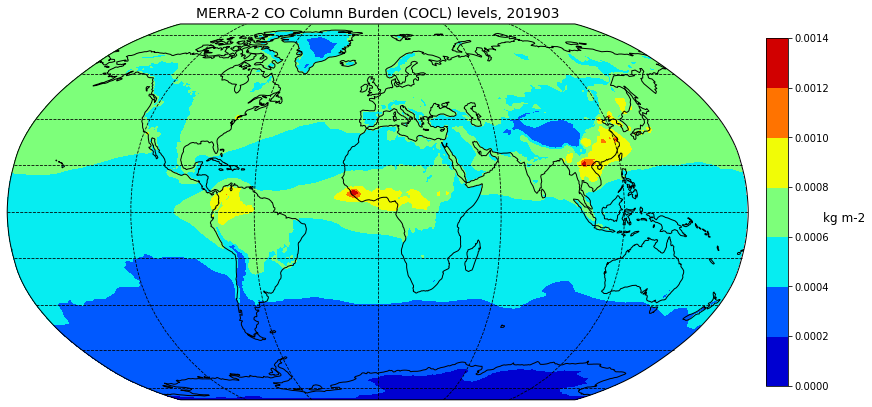

MERRA2_400.tavgM_2d_chm_Nx.201904.nc4 201904


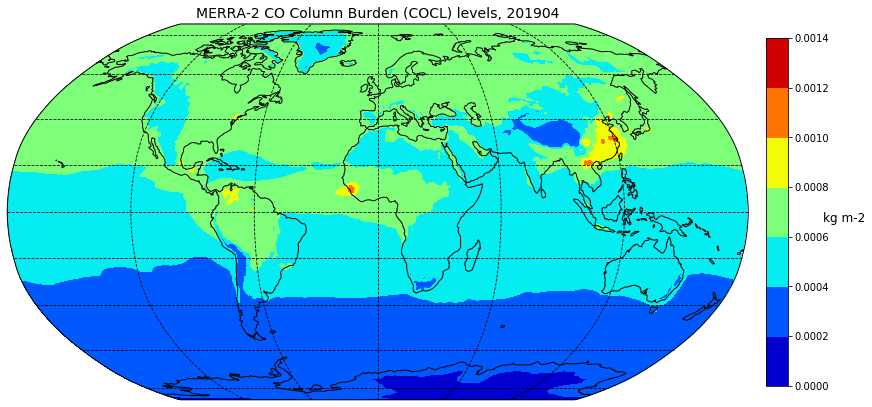

MERRA2_400.tavgM_2d_chm_Nx.201905.nc4 201905


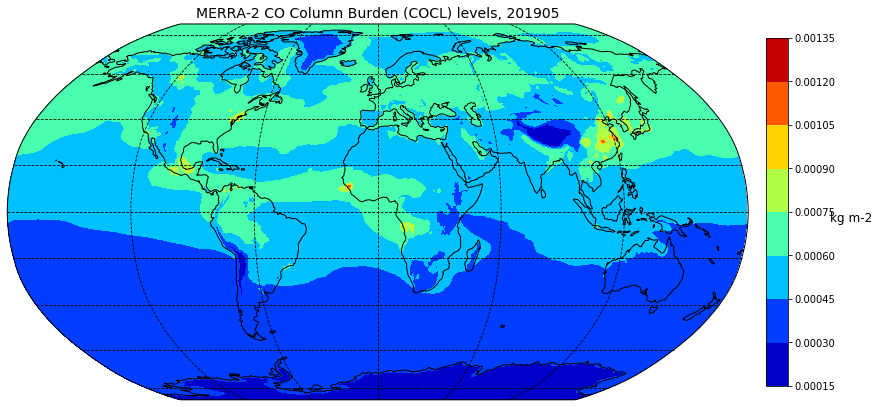

MERRA2_400.tavgM_2d_chm_Nx.201906.nc4 201906


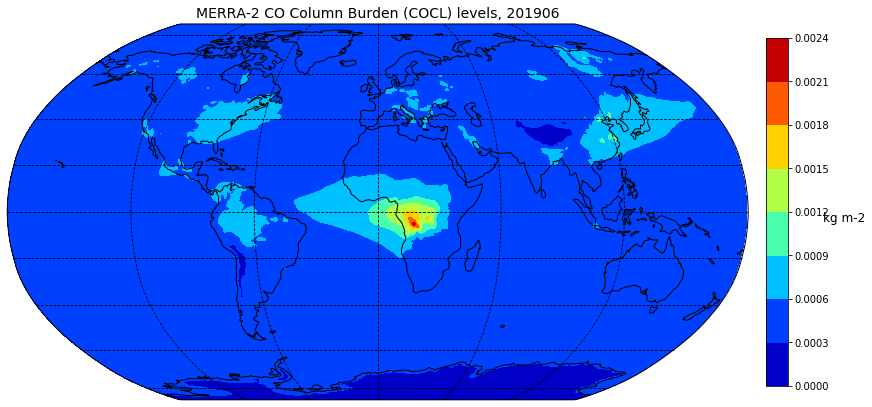

MERRA2_400.tavgM_2d_chm_Nx.201907.nc4 201907


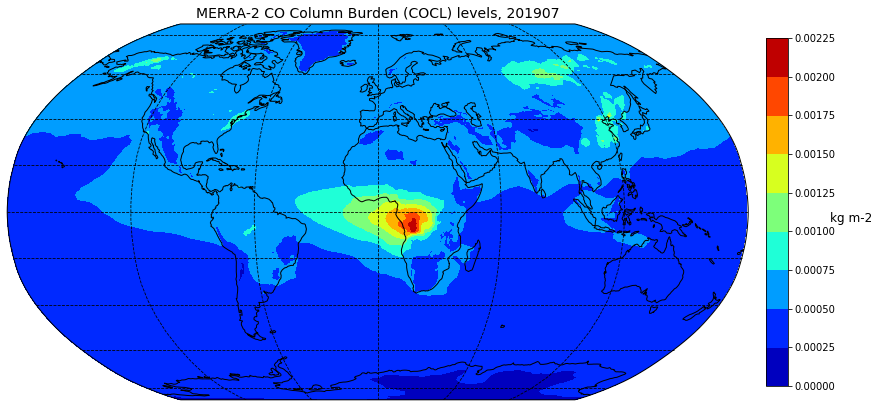

MERRA2_400.tavgM_2d_chm_Nx.201908.nc4 201908


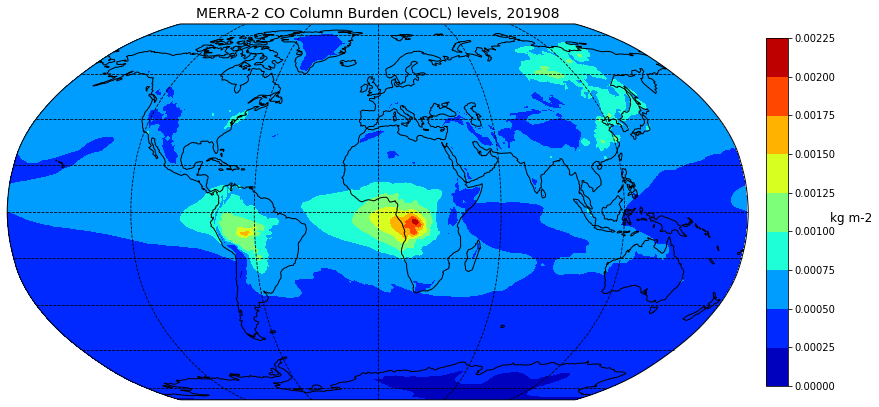

MERRA2_400.tavgM_2d_chm_Nx.201909.nc4 201909


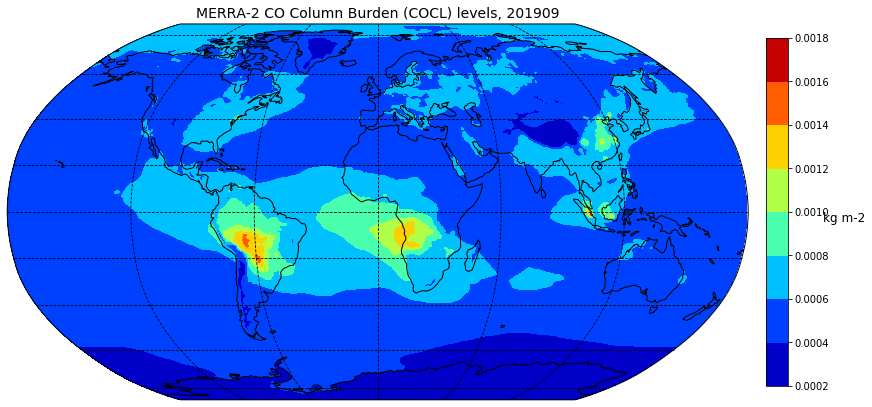

MERRA2_400.tavgM_2d_chm_Nx.201910.nc4 201910


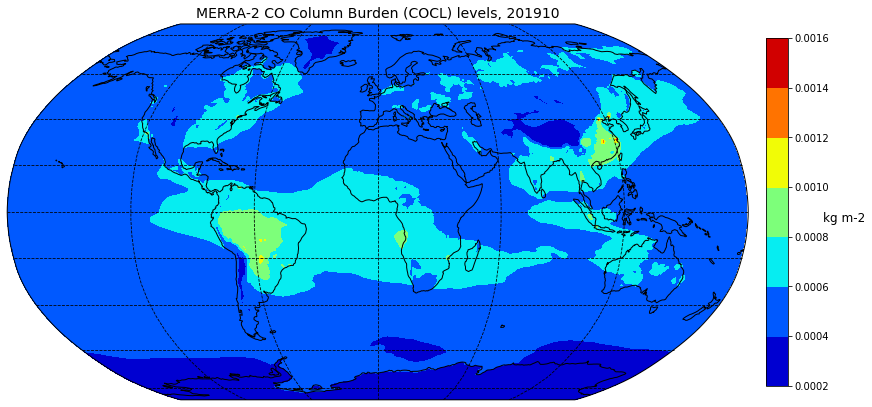

MERRA2_400.tavgM_2d_chm_Nx.201911.nc4 201911


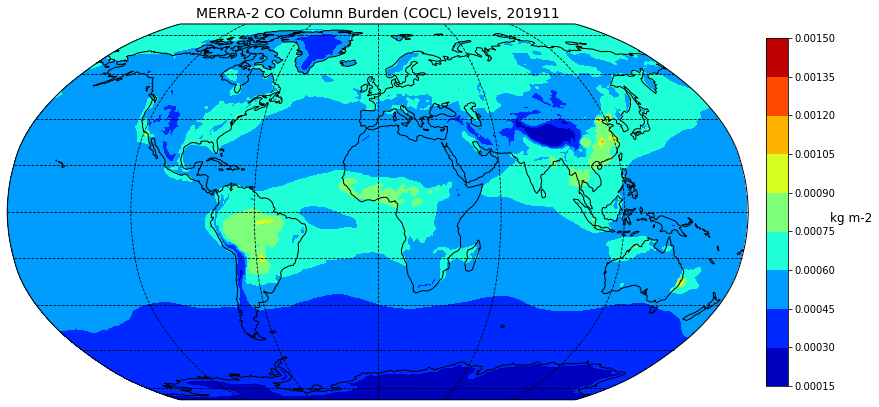

MERRA2_400.tavgM_2d_chm_Nx.201912.nc4 201912


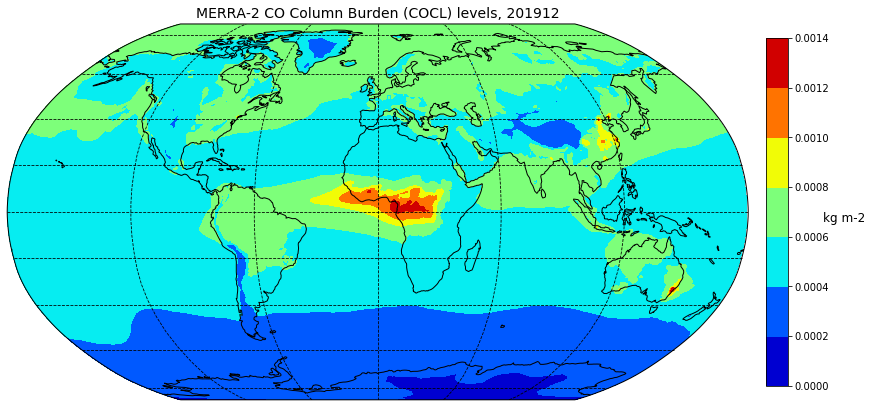

MERRA2_400.tavgM_2d_chm_Nx.202001.nc4 202001


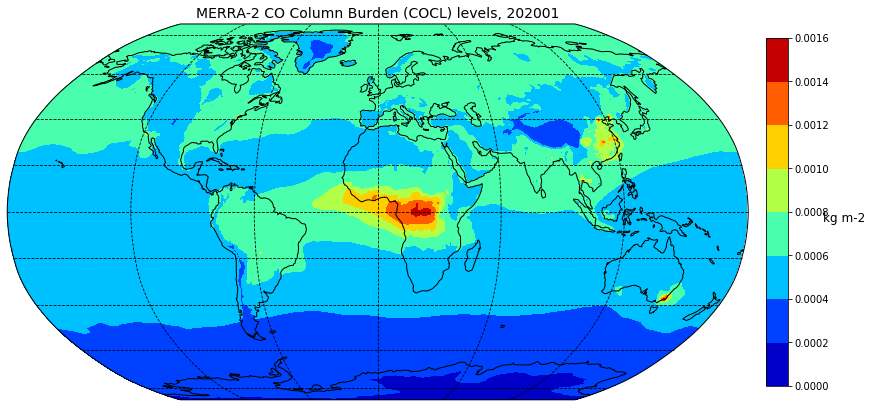

MERRA2_400.tavgM_2d_chm_Nx.202002.nc4 202002


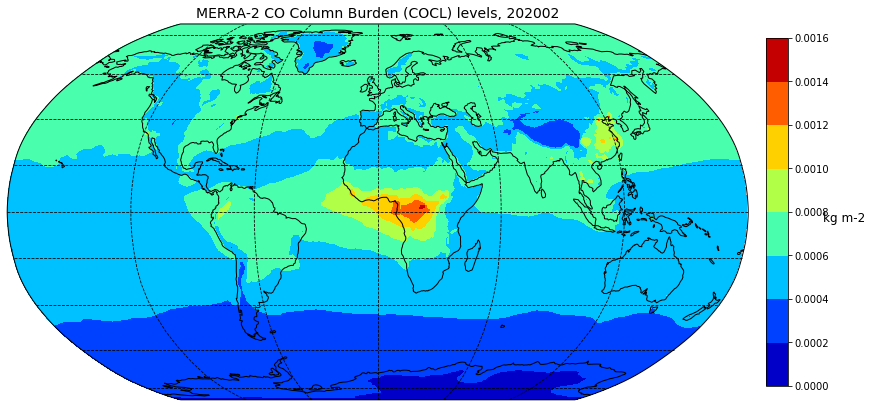

MERRA2_400.tavgM_2d_chm_Nx.202003.nc4 202003


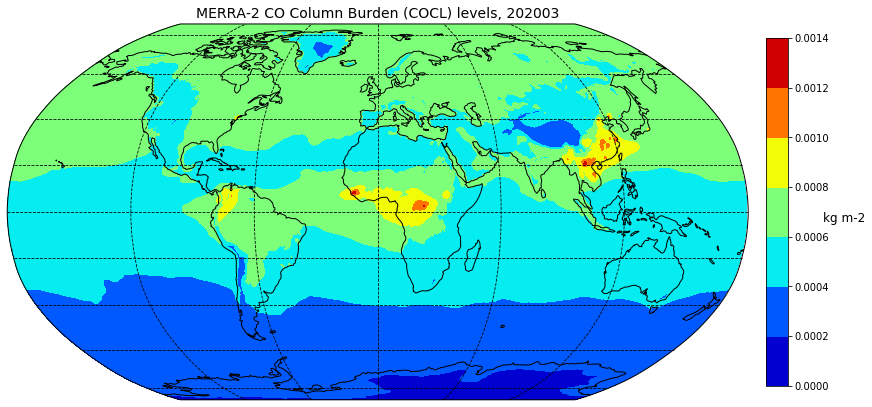

MERRA2_400.tavgM_2d_chm_Nx.202004.nc4 202004


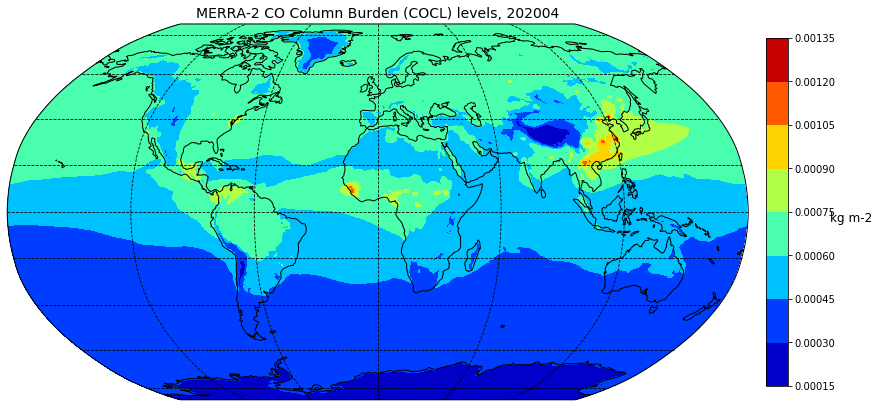

In [22]:
for file in os.listdir("../data/earthdata-merra2-co/co2MERA"):
    file_date = file.split(".")[-2]
    print(file, file_date)
    file_path = os.path.join("../data/earthdata-merra2-co/co2MERA", file)
    data = Dataset(file_path, more="r")
    lons = data.variables['lon'][:]
    lats = data.variables['lat'][:]
    time = data.variables['time'][:]
    COCL = data.variables['COCL'][:,:,:]; COCL = COCL[0,:,:]
    plot_merra_data(COCL, title='CO Column Burden (COCL)', date=file_date, label="kg m-2")

## CO Emissions [kg m-2 s-1]

MERRA2_400.tavgM_2d_chm_Nx.201901.nc4 201901


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  


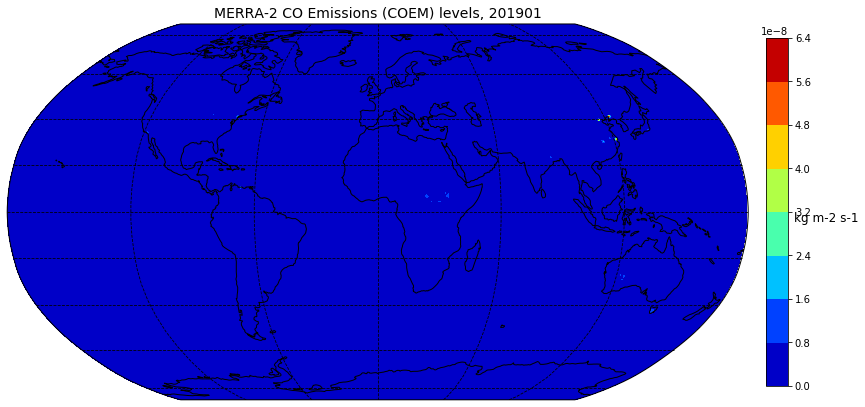

MERRA2_400.tavgM_2d_chm_Nx.201902.nc4 201902


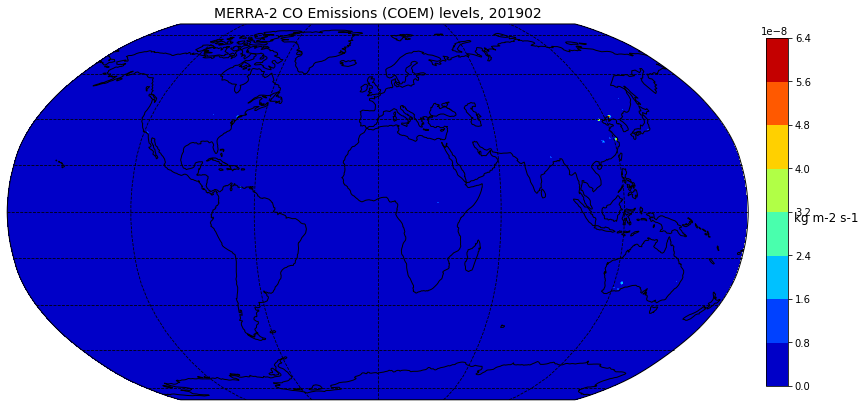

MERRA2_400.tavgM_2d_chm_Nx.201903.nc4 201903


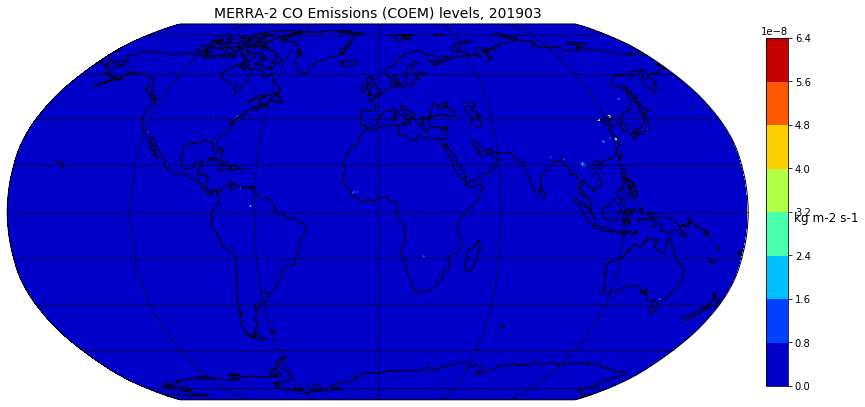

MERRA2_400.tavgM_2d_chm_Nx.201904.nc4 201904


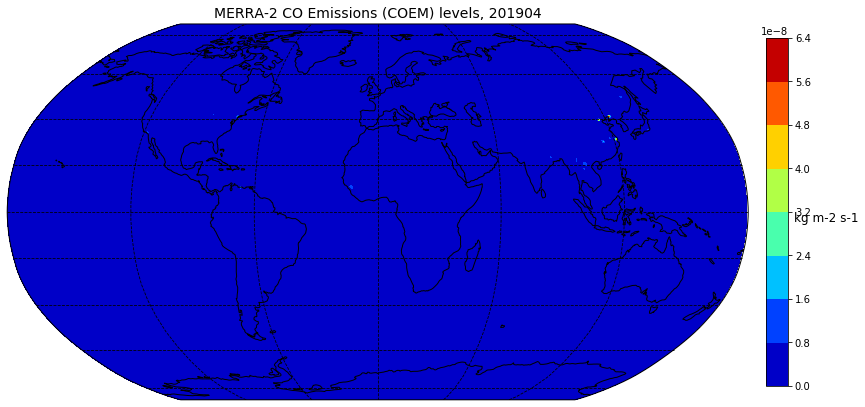

MERRA2_400.tavgM_2d_chm_Nx.201905.nc4 201905


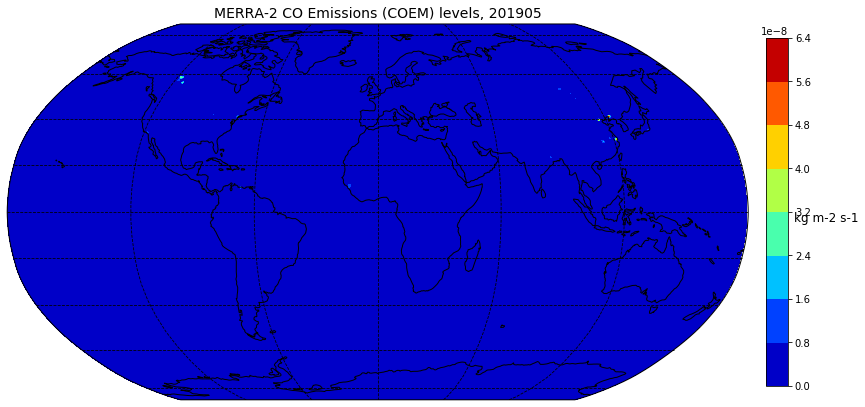

MERRA2_400.tavgM_2d_chm_Nx.201906.nc4 201906


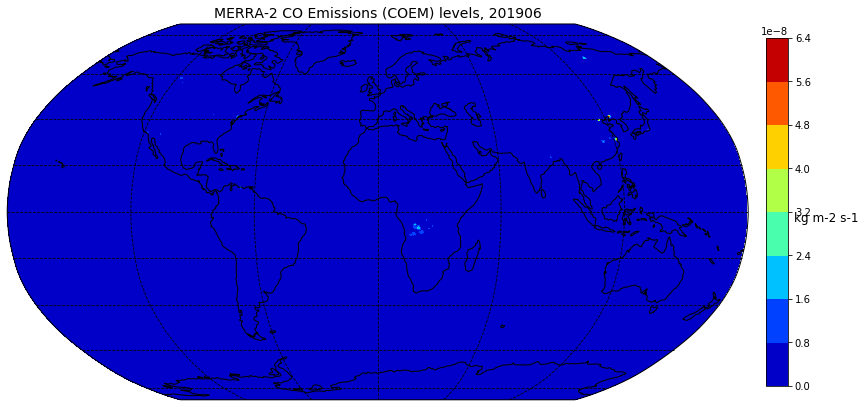

MERRA2_400.tavgM_2d_chm_Nx.201907.nc4 201907


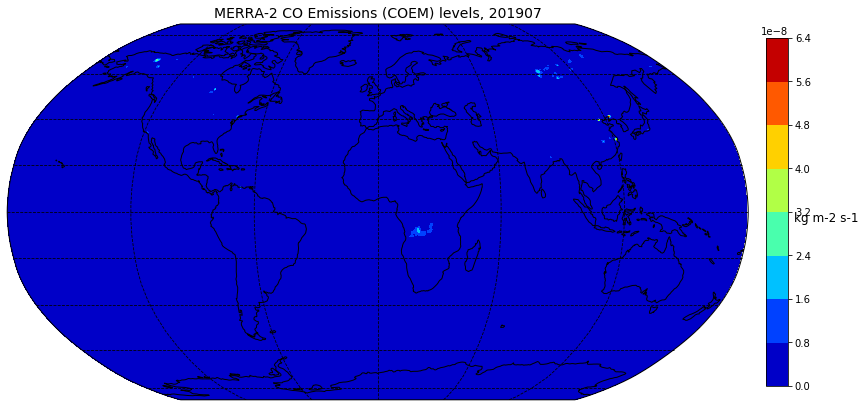

MERRA2_400.tavgM_2d_chm_Nx.201908.nc4 201908


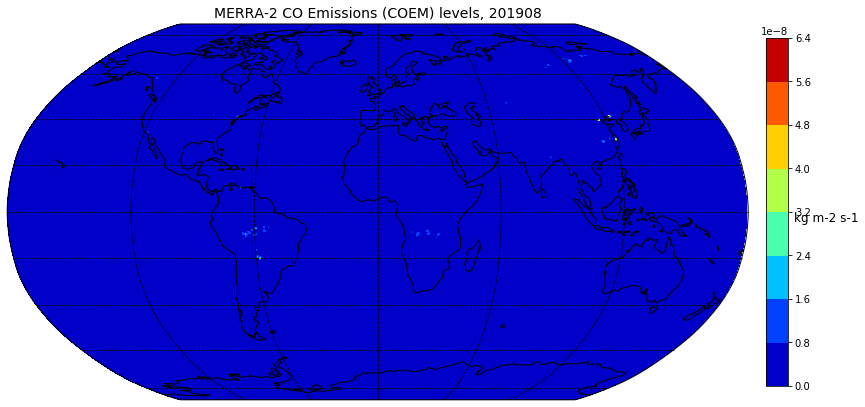

MERRA2_400.tavgM_2d_chm_Nx.201909.nc4 201909


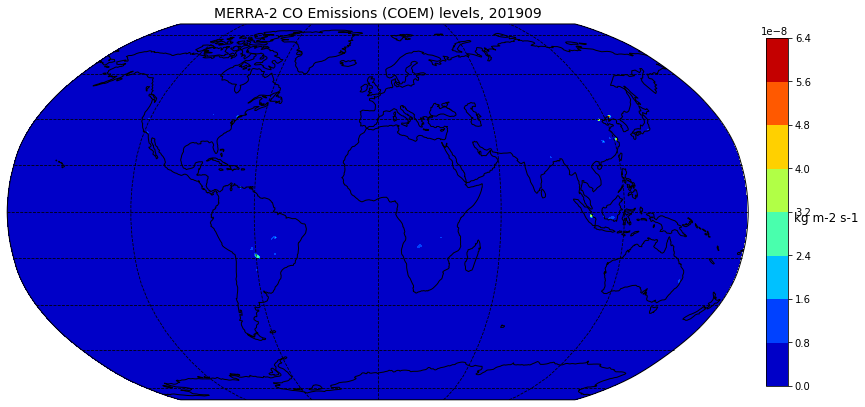

MERRA2_400.tavgM_2d_chm_Nx.201910.nc4 201910


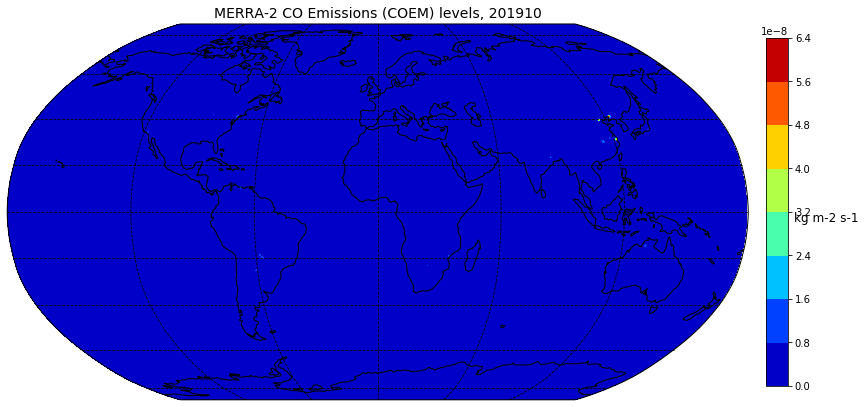

MERRA2_400.tavgM_2d_chm_Nx.201911.nc4 201911


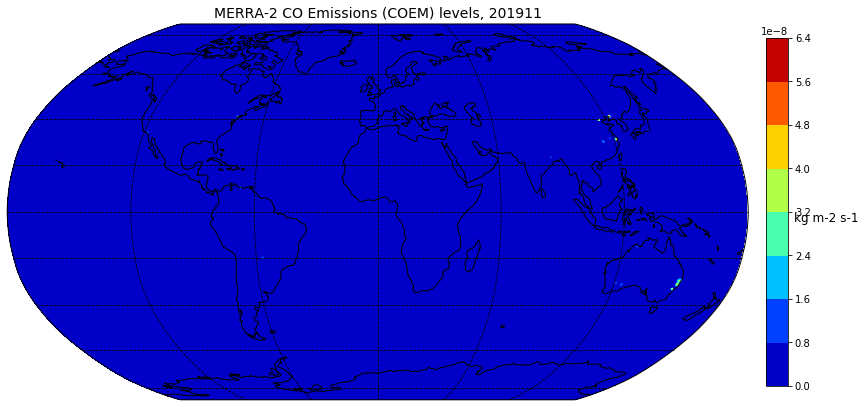

MERRA2_400.tavgM_2d_chm_Nx.201912.nc4 201912


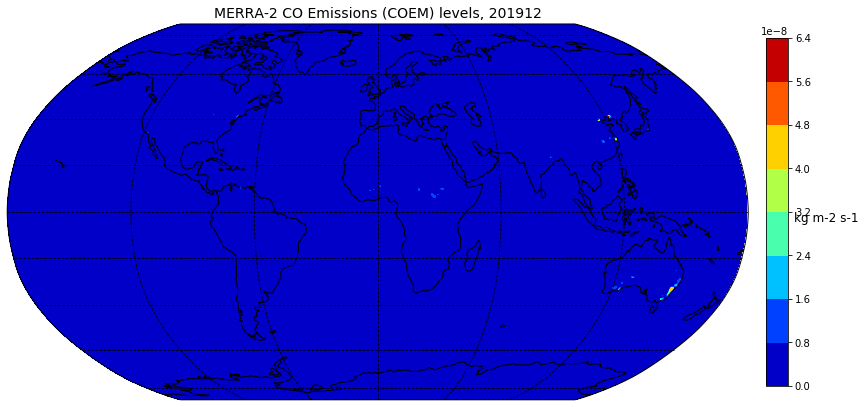

MERRA2_400.tavgM_2d_chm_Nx.202001.nc4 202001


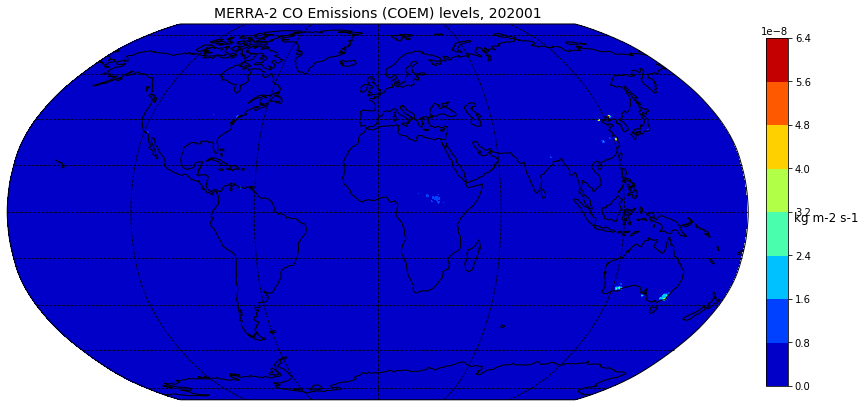

MERRA2_400.tavgM_2d_chm_Nx.202002.nc4 202002


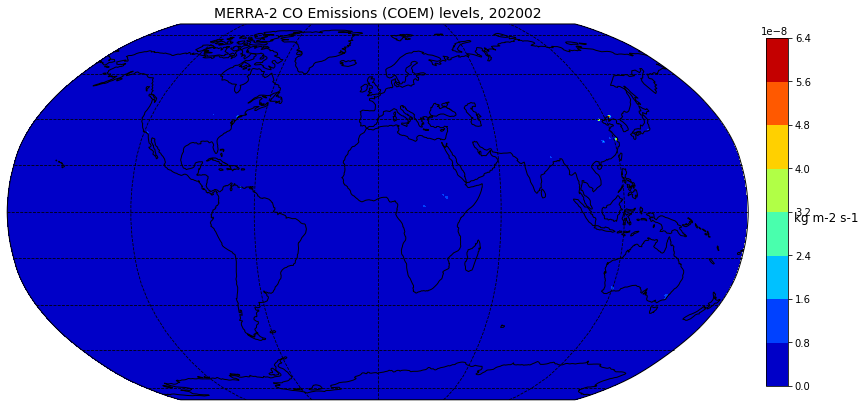

MERRA2_400.tavgM_2d_chm_Nx.202003.nc4 202003


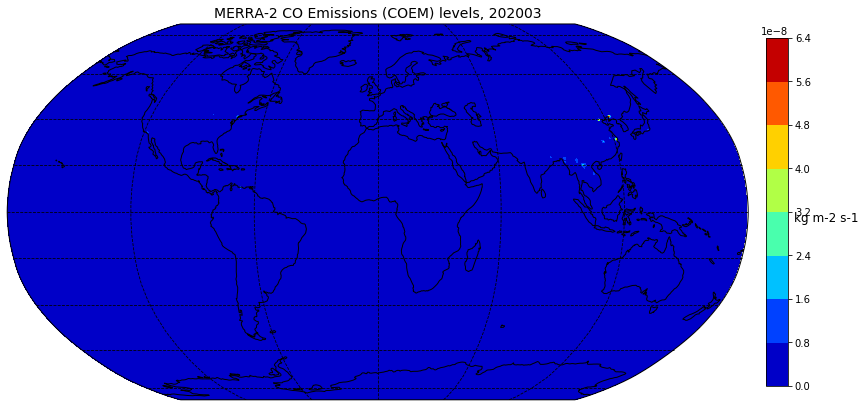

MERRA2_400.tavgM_2d_chm_Nx.202004.nc4 202004


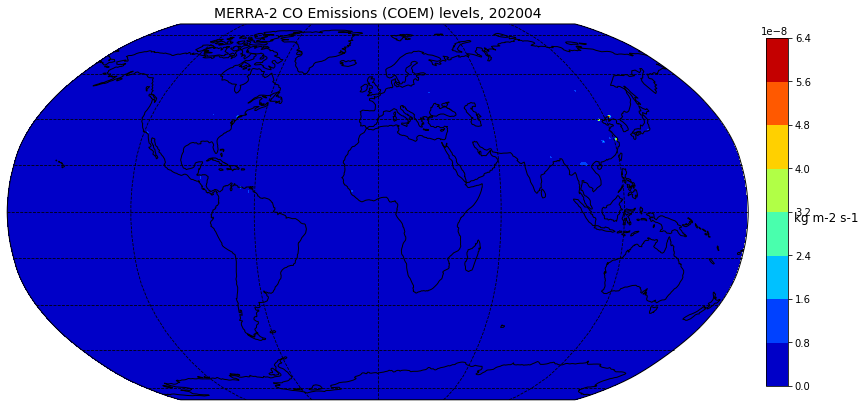

In [24]:
for file in os.listdir("../data/earthdata-merra2-co/co2MERA"):
    file_date = file.split(".")[-2]
    print(file, file_date)
    file_path = os.path.join("../data/earthdata-merra2-co/co2MERA", file)
    data = Dataset(file_path, more="r")
    lons = data.variables['lon'][:]
    lats = data.variables['lat'][:]
    time = data.variables['time'][:]
    COEM = data.variables['COEM'][:,:,:]; COEM = COEM[0,:,:]
    plot_merra_data(COEM, title='CO Emissions (COEM)', date=file_date, label="kg m-2 s-1")

MERRA2_400.tavgM_2d_chm_Nx.201901.nc4 201901


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  


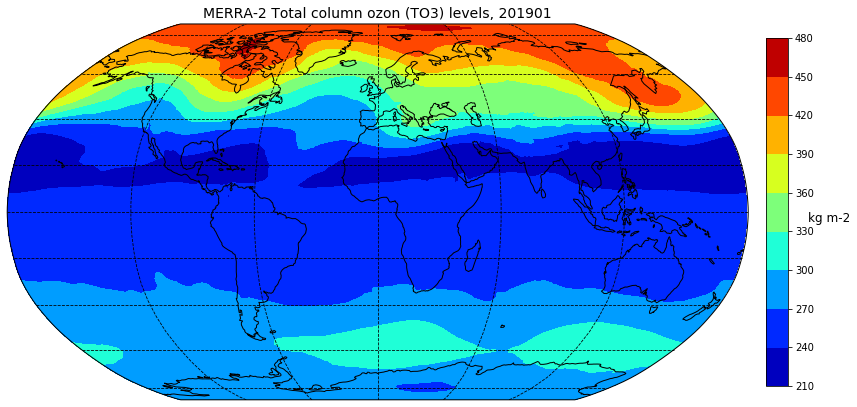

MERRA2_400.tavgM_2d_chm_Nx.201902.nc4 201902


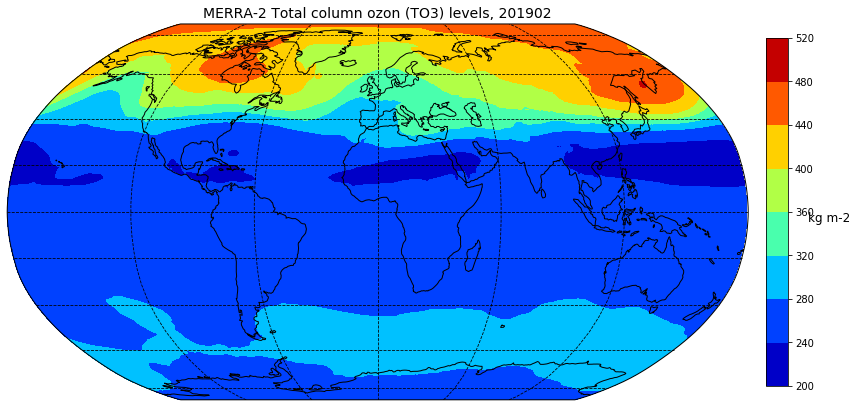

MERRA2_400.tavgM_2d_chm_Nx.201903.nc4 201903


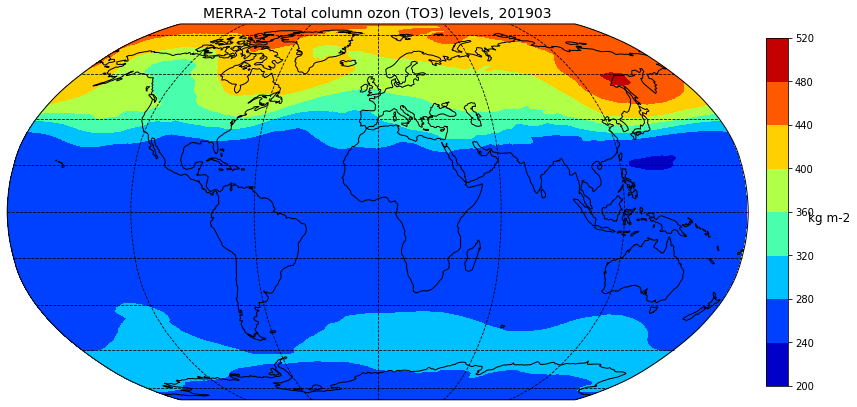

MERRA2_400.tavgM_2d_chm_Nx.201904.nc4 201904


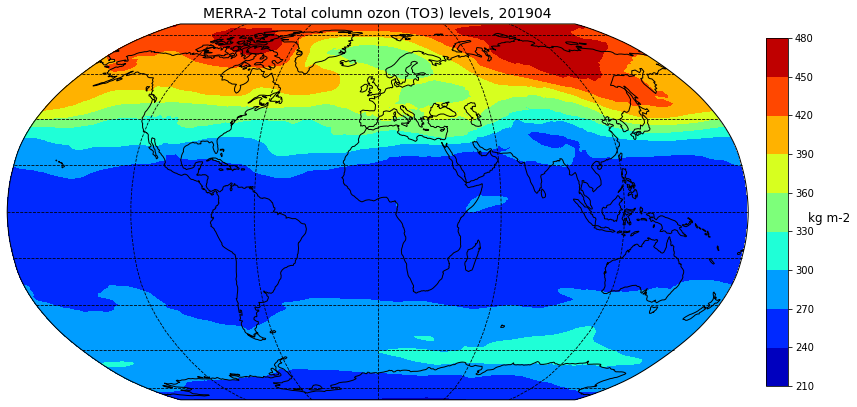

MERRA2_400.tavgM_2d_chm_Nx.201905.nc4 201905


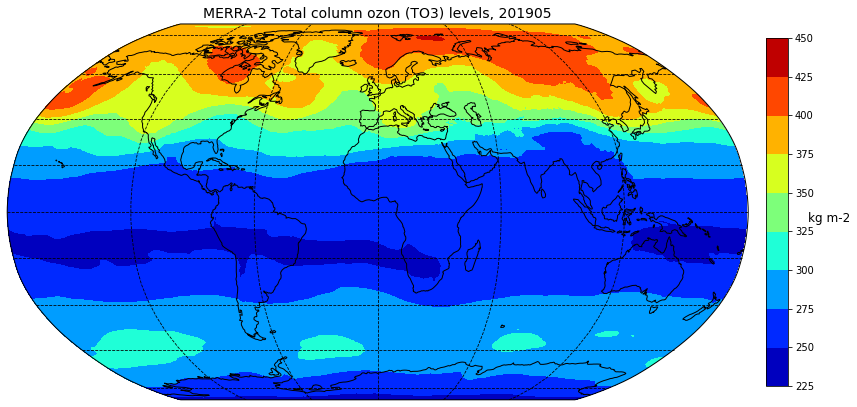

MERRA2_400.tavgM_2d_chm_Nx.201906.nc4 201906


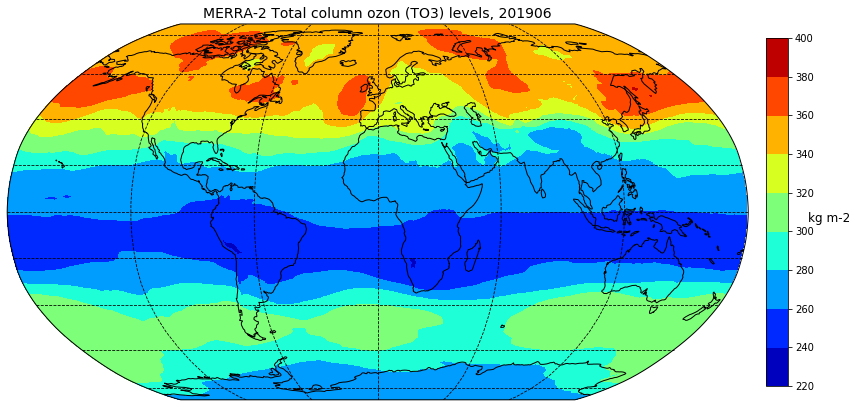

MERRA2_400.tavgM_2d_chm_Nx.201907.nc4 201907


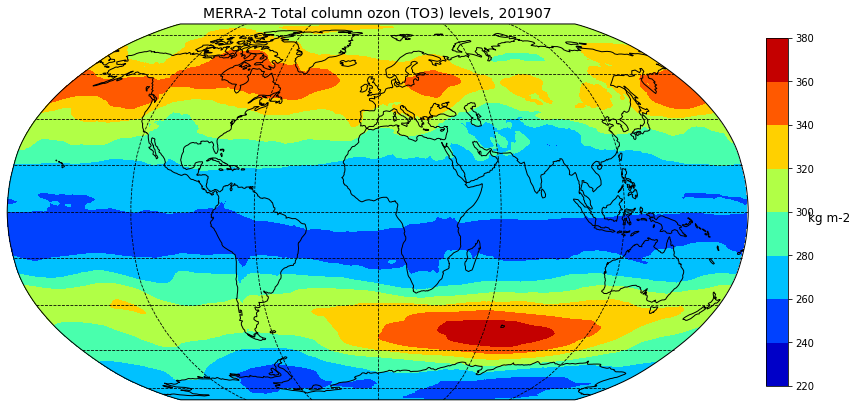

MERRA2_400.tavgM_2d_chm_Nx.201908.nc4 201908


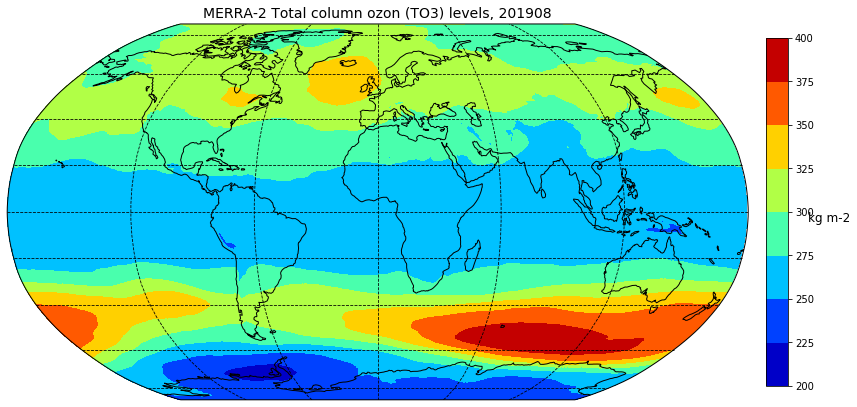

MERRA2_400.tavgM_2d_chm_Nx.201909.nc4 201909


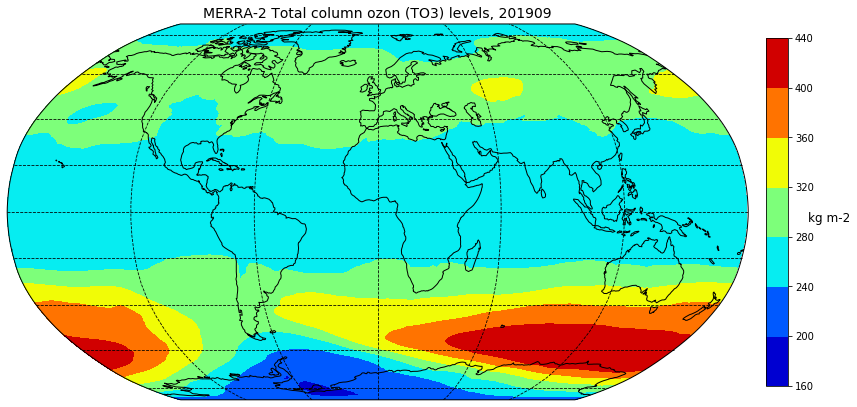

MERRA2_400.tavgM_2d_chm_Nx.201910.nc4 201910


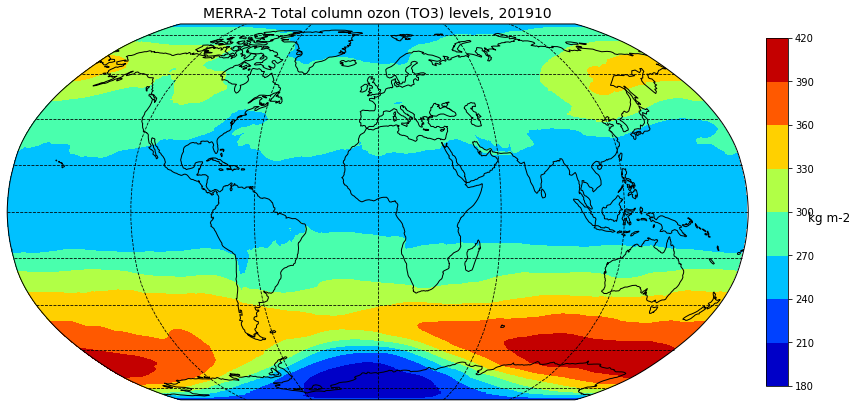

MERRA2_400.tavgM_2d_chm_Nx.201911.nc4 201911


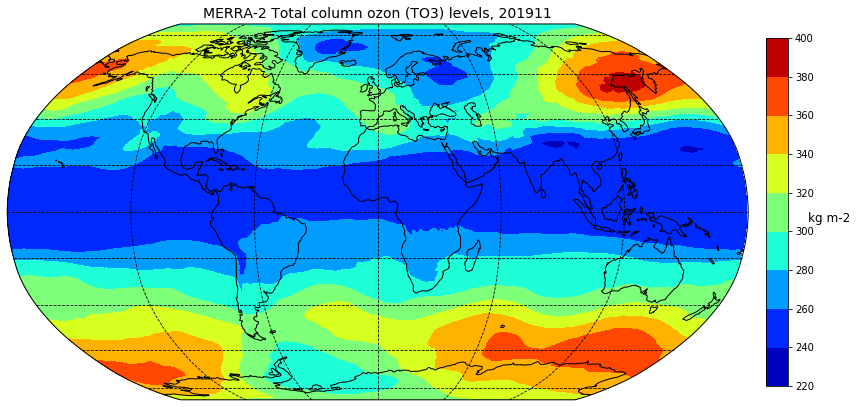

MERRA2_400.tavgM_2d_chm_Nx.201912.nc4 201912


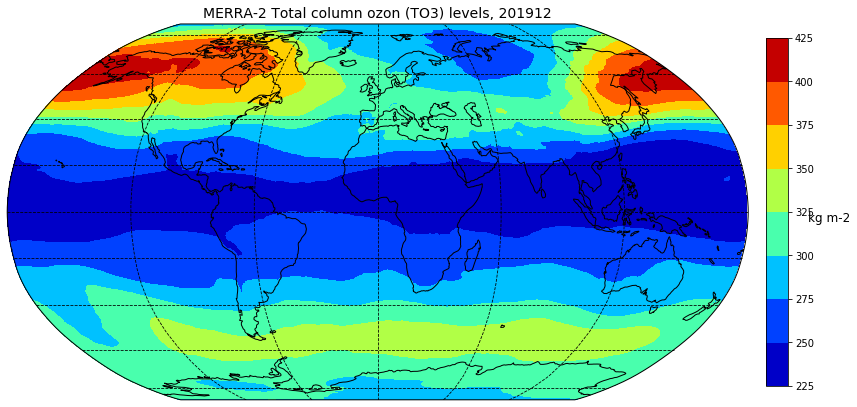

MERRA2_400.tavgM_2d_chm_Nx.202001.nc4 202001


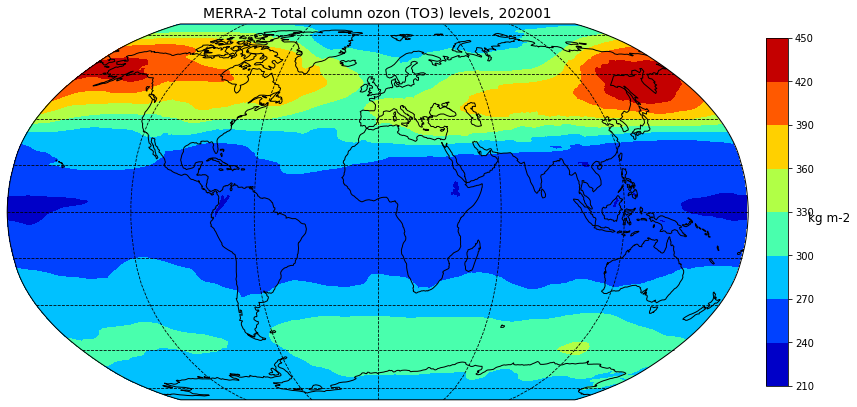

MERRA2_400.tavgM_2d_chm_Nx.202002.nc4 202002


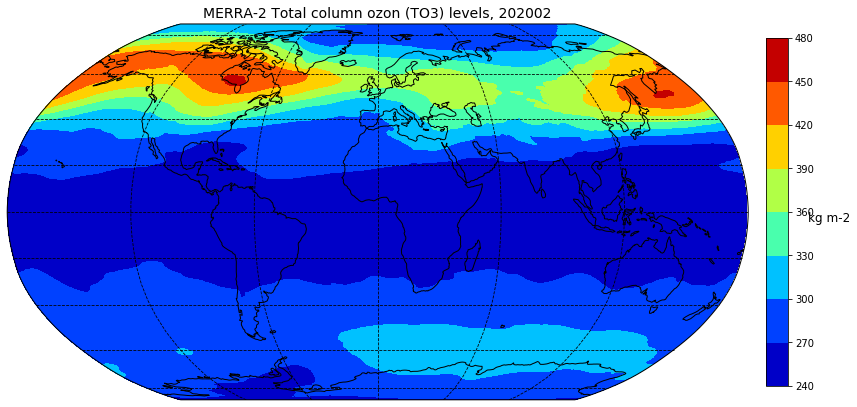

MERRA2_400.tavgM_2d_chm_Nx.202003.nc4 202003


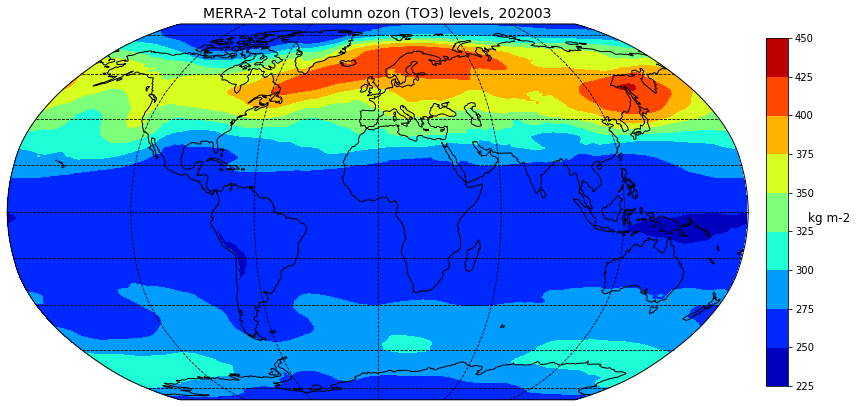

MERRA2_400.tavgM_2d_chm_Nx.202004.nc4 202004


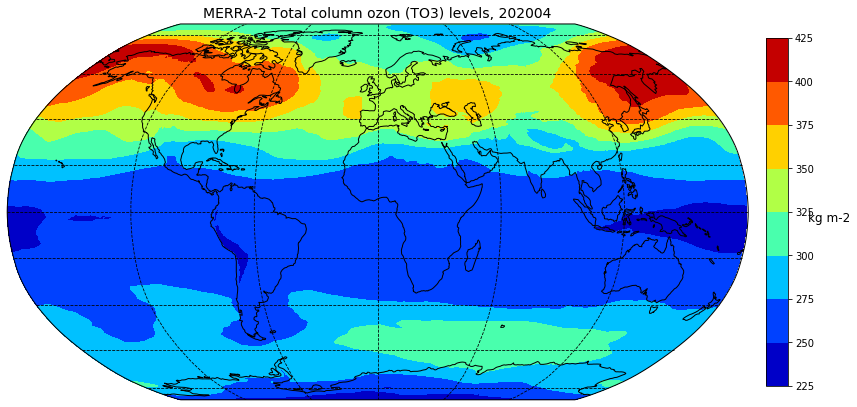

In [25]:
for file in os.listdir("../data/earthdata-merra2-co/co2MERA"):
    file_date = file.split(".")[-2]
    print(file, file_date)
    file_path = os.path.join("../data/earthdata-merra2-co/co2MERA", file)
    data = Dataset(file_path, more="r")
    lons = data.variables['lon'][:]
    lats = data.variables['lat'][:]
    time = data.variables['time'][:]
    TO3 = data.variables['TO3'][:,:,:]; TO3 = TO3[0,:,:]
    plot_merra_data(TO3, title='Total column ozon (TO3)', date=file_date)

MERRA2_400.tavgM_2d_chm_Nx.201901.nc4 201901


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  


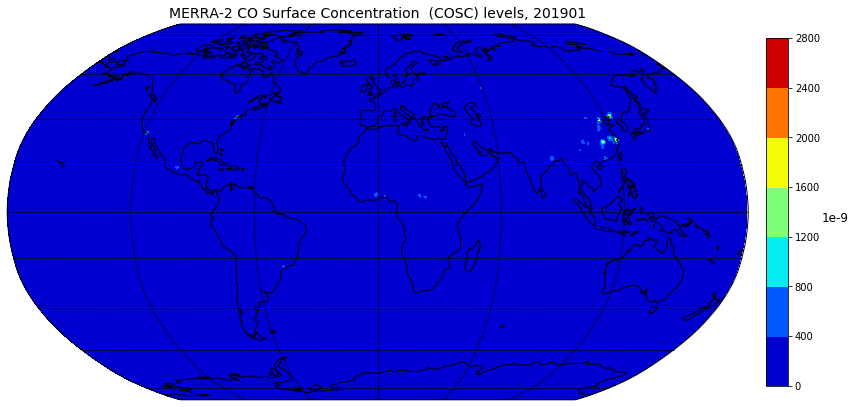

MERRA2_400.tavgM_2d_chm_Nx.201902.nc4 201902


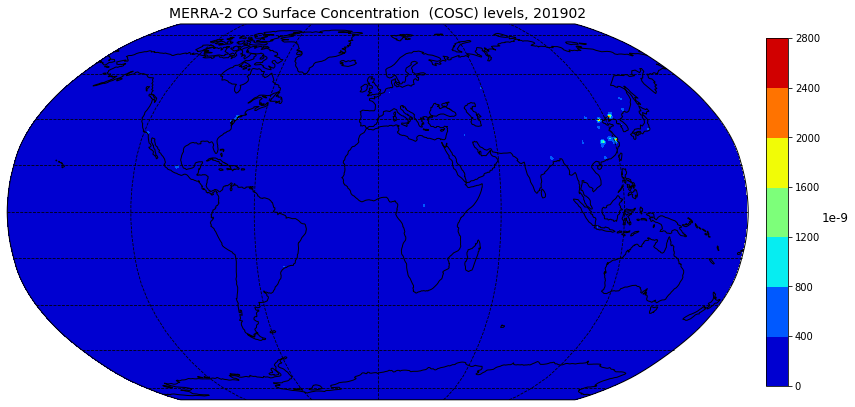

MERRA2_400.tavgM_2d_chm_Nx.201903.nc4 201903


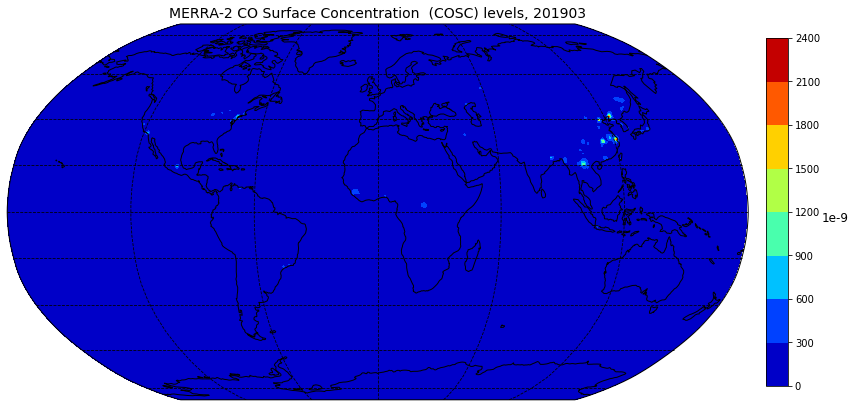

MERRA2_400.tavgM_2d_chm_Nx.201904.nc4 201904


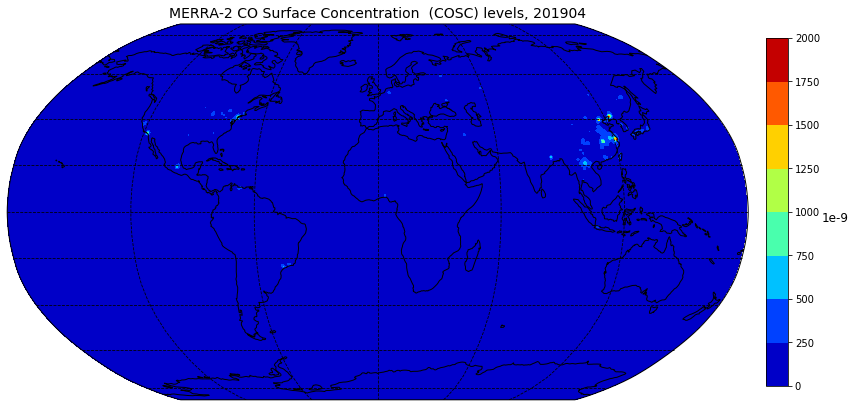

MERRA2_400.tavgM_2d_chm_Nx.201905.nc4 201905


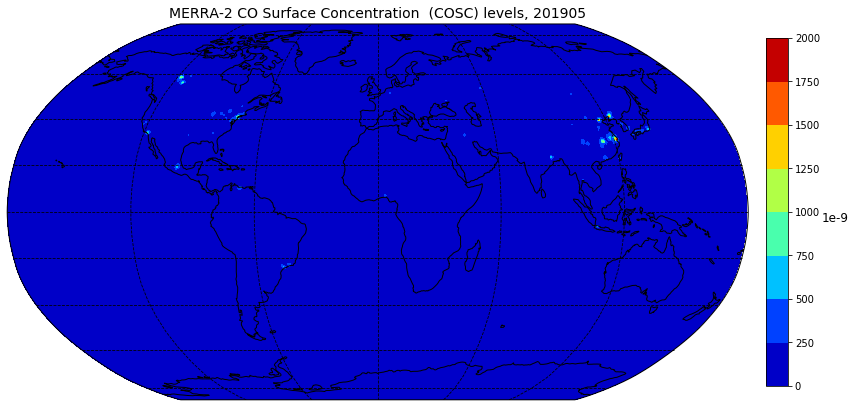

MERRA2_400.tavgM_2d_chm_Nx.201906.nc4 201906


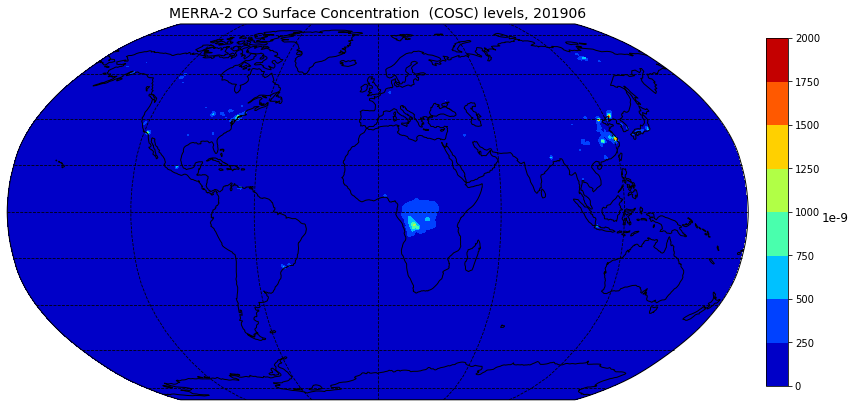

MERRA2_400.tavgM_2d_chm_Nx.201907.nc4 201907


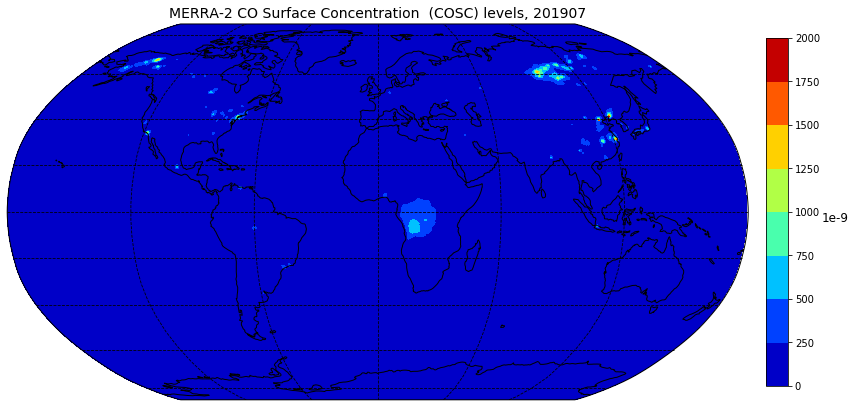

MERRA2_400.tavgM_2d_chm_Nx.201908.nc4 201908


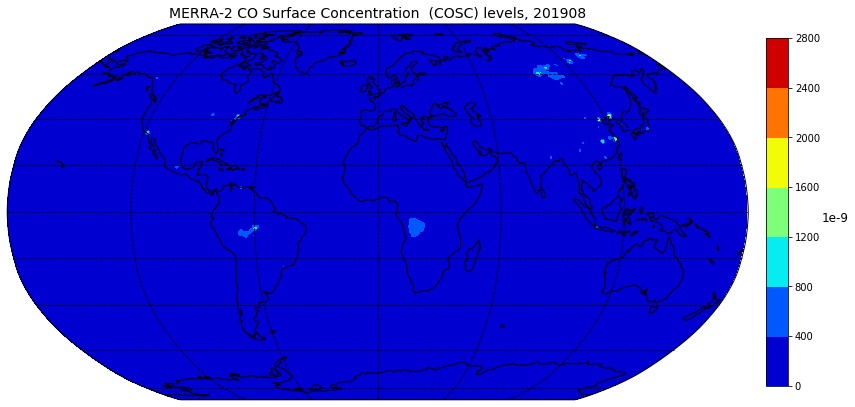

MERRA2_400.tavgM_2d_chm_Nx.201909.nc4 201909


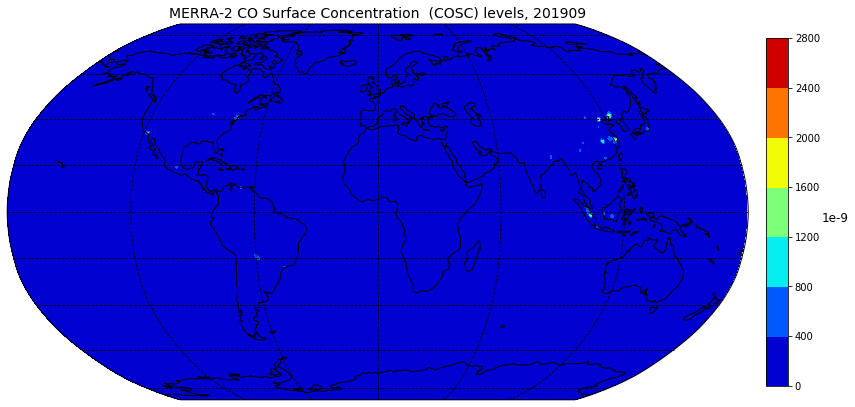

MERRA2_400.tavgM_2d_chm_Nx.201910.nc4 201910


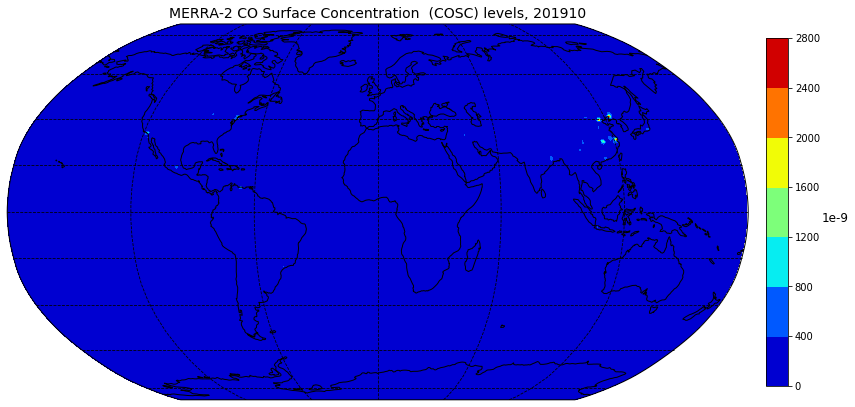

MERRA2_400.tavgM_2d_chm_Nx.201911.nc4 201911


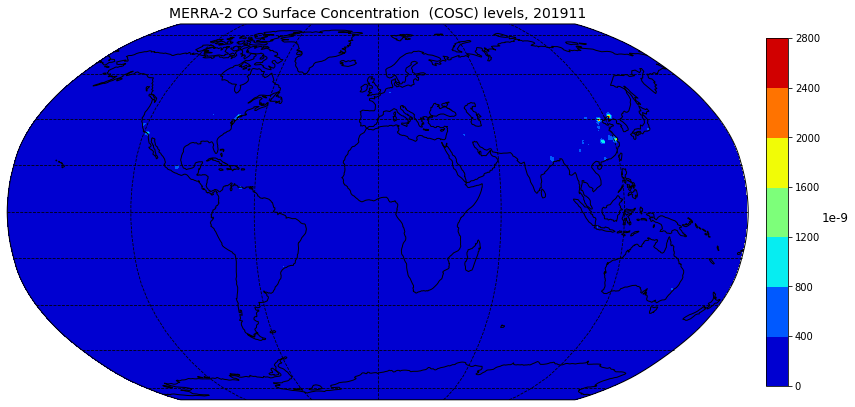

MERRA2_400.tavgM_2d_chm_Nx.201912.nc4 201912


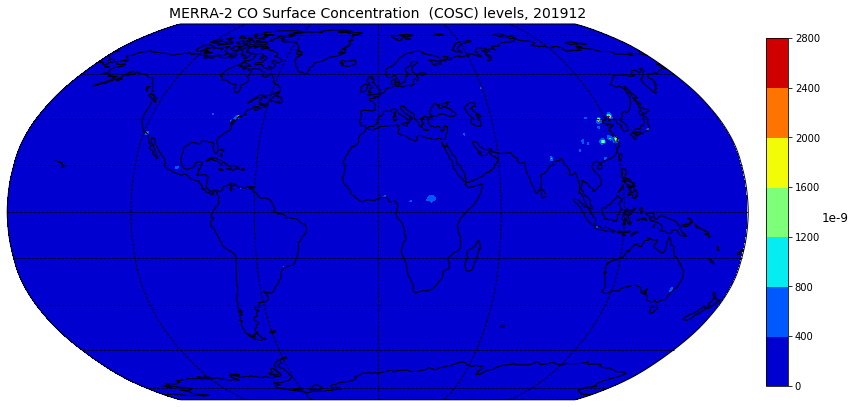

MERRA2_400.tavgM_2d_chm_Nx.202001.nc4 202001


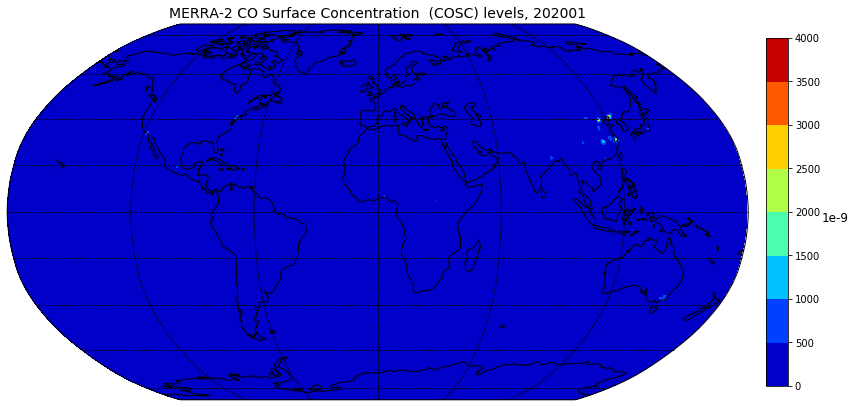

MERRA2_400.tavgM_2d_chm_Nx.202002.nc4 202002


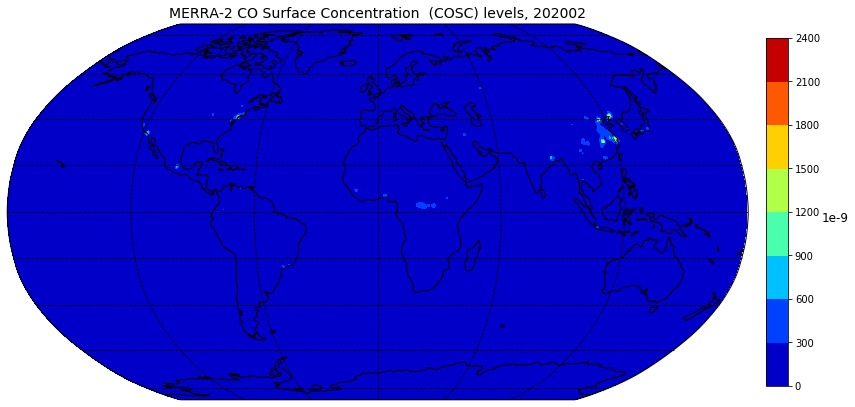

MERRA2_400.tavgM_2d_chm_Nx.202003.nc4 202003


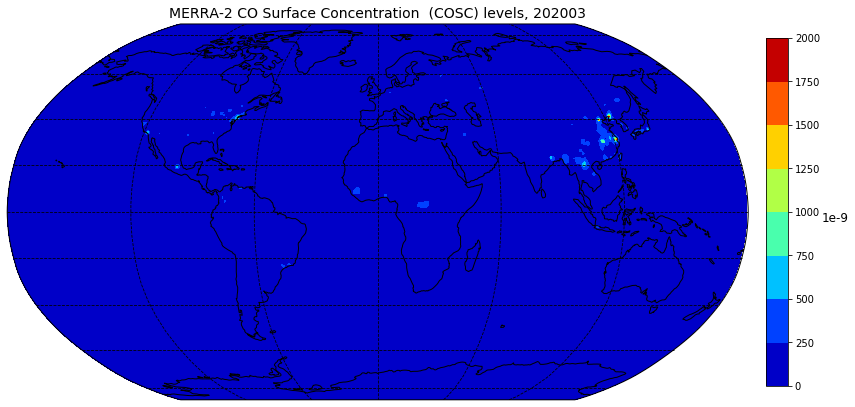

MERRA2_400.tavgM_2d_chm_Nx.202004.nc4 202004


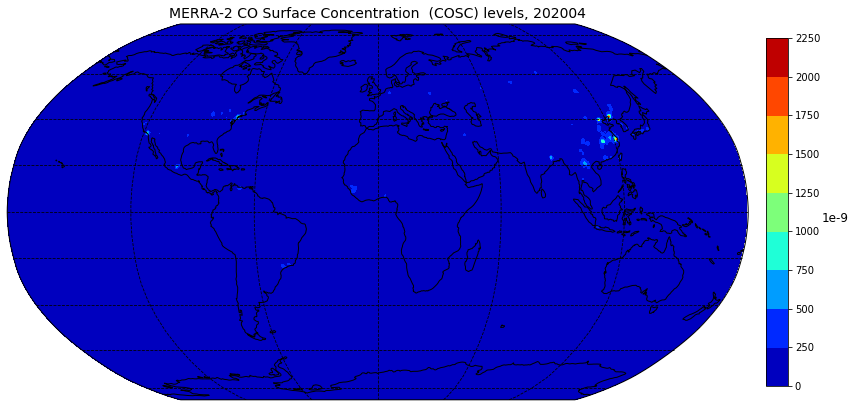

In [27]:
for file in os.listdir("../data/earthdata-merra2-co/co2MERA"):
    file_date = file.split(".")[-2]
    print(file, file_date)
    file_path = os.path.join("../data/earthdata-merra2-co/co2MERA", file)
    data = Dataset(file_path, more="r")
    lons = data.variables['lon'][:]
    lats = data.variables['lat'][:]
    time = data.variables['time'][:]
    COSC = data.variables['COSC'][:,:,:]; COSC = COSC[0,:,:]
    plot_merra_data(COSC, title='CO Surface Concentration  (COSC)', date=file_date, label="1e-9")